,date,explanation,hdurl,media_type,service_version,title,url,copyright
0,2023-01-01,"There, that dot on the right, that's the large...",https://apod.nasa.gov/apod/image/2301/PaleBlue...,image,v1,The Largest Rock in our Solar System,https://apod.nasa.gov/apod/image/2301/PaleBlue...,NaN
1,2023-01-02,Look up tonight and see a whole bunch of plane...,https://apod.nasa.gov/apod/image/2301/AllPlane...,image,v1,After Sunset Planet Parade,https://apod.nasa.gov/apod/image/2301/AllPlane...,Tunc Tezel
2,2023-01-03,This line of stars is real. A little too faint...,https://apod.nasa.gov/apod/image/2301/KembleCa...,image,v1,Kemble’s Cascade of Stars,https://apod.nasa.gov/apod/image/2301/KembleCa...,\nTommy Lease\n
3,2023-01-04,Can a gas cloud eat a galaxy? It's not even c...,https://apod.nasa.gov/apod/image/2301/cg4_selb...,image,v1,CG4: The Globule and the Galaxy,https://apod.nasa.gov/apod/image/2301/cg4_selb...,Mike Selby
4,2023-01-05,Hurtling through a cosmic dust cloud a mere 40...,https://apod.nasa.gov/apod/image/2301/M_45_Ple...,image,v1,Messier 45: The Daughters of Atlas and Pleione,https://apod.nasa.gov/apod/image/2301/M_45_Ple...,Stefan Thrun


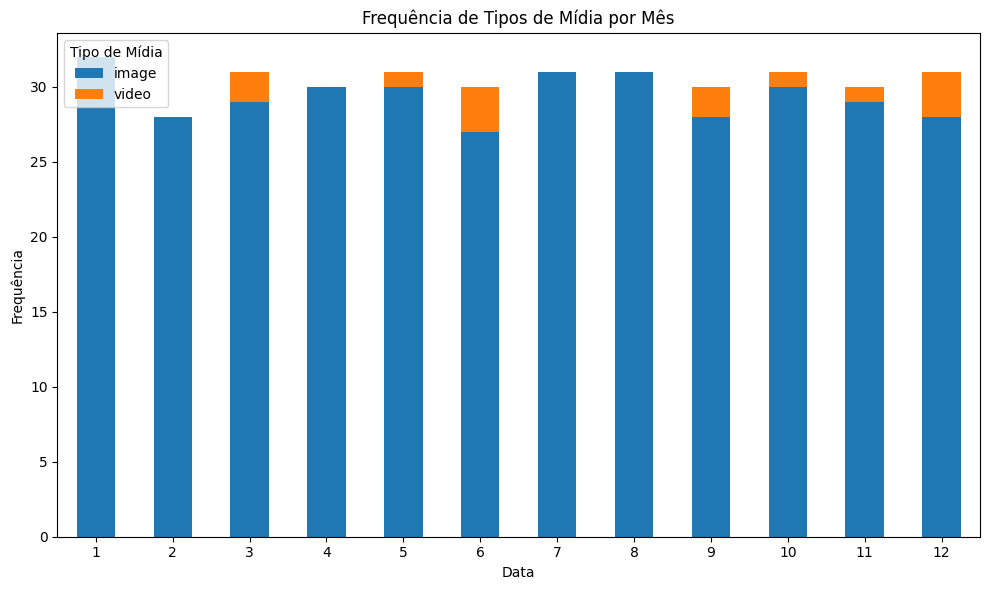

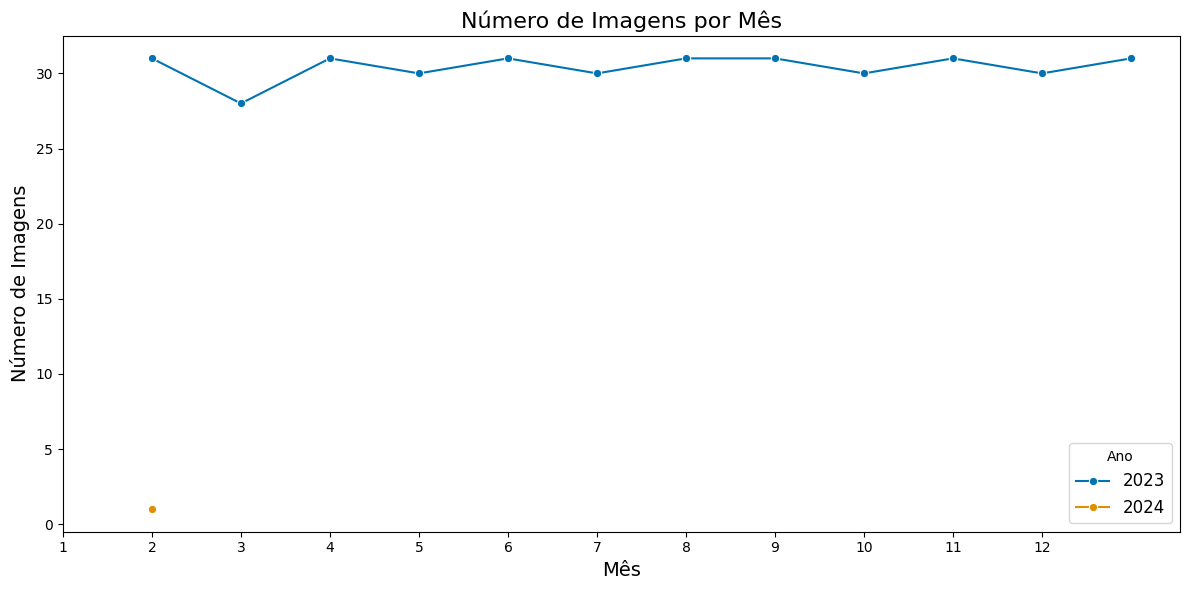

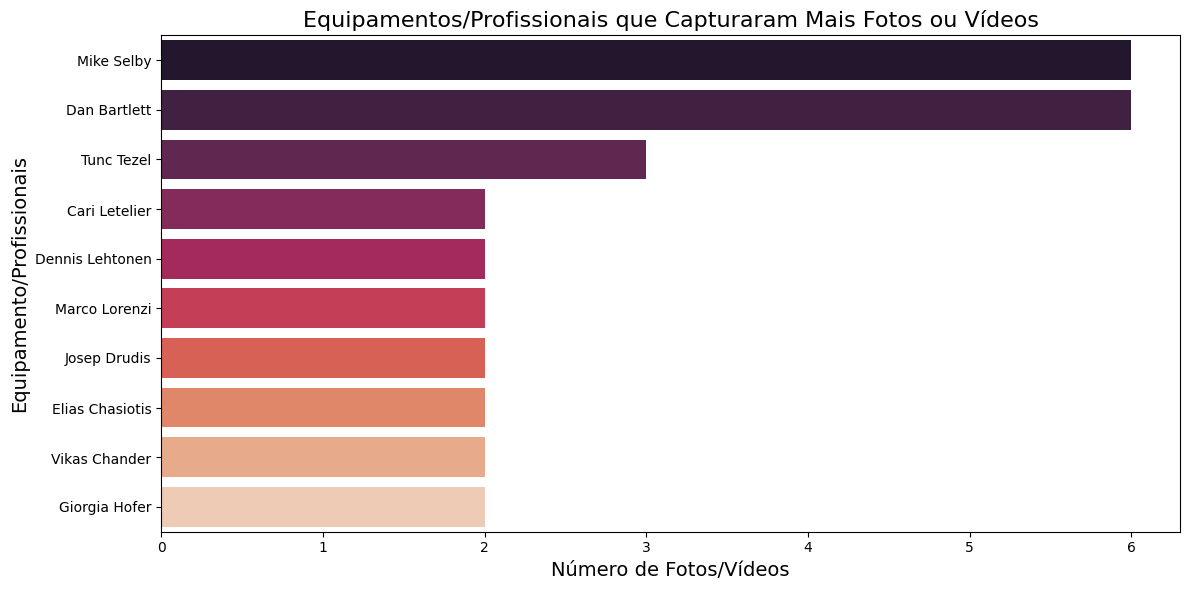

,date,year,month,day
count,366,366.000000,366.000000,366.000000
mean,2023-07-02 11:59:59.999999744,2023.002732,6.510929,15.680328
min,2023-01-01 00:00:00,2023.000000,1.000000,1.000000
25%,2023-04-02 06:00:00,2023.000000,4.000000,8.000000
50%,2023-07-02 12:00:00,2023.000000,7.000000,16.000000
75%,2023-10-01 18:00:00,2023.000000,9.750000,23.000000
max,2024-01-01 00:00:00,2024.000000,12.000000,31.000000
std,NaN,0.052271,3.459930,8.829837


In [7]:
# Importação das bibliotecas necessárias
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
!pip install python-dotenv
from dotenv import load_dotenv
import os

# Carregar informações .env (está sendo utilizado variáveis de ambiente para a proteção da API Key (pessoal))
load_dotenv()
api_key = os.getenv('API_KEY')

# Definição de função para a extração dos dados 'Astronomy Picture of the Day (APOD)'
def get_nasa_apod_data(api_key, start_date, end_date):
    url = 'https://api.nasa.gov/planetary/apod' # URL da API para acessar os dados utilizando a API Key
    params = {
        'api_key': api_key,
        'start_date': start_date,
        'end_date': end_date
    }
    response = requests.get(url, params=params) # Definição dos parâmetros de requisição para a API

    # Verificação da resposta da API
    if response.status_code != 200: # Identificar possíveis erros de requisição
        print(f'Erro ao acessar API: {response.status_code}')
        return None

    # Retornar os dados JSON encontrados
    return response.json()

# Definição dos dados necessários para acessar as informações
api_key = 'TPKAeaBVbDIofSAualIosLxyW5DuFceFp12iNb07'  # Minha API Key obtida no site da NASA
start_date = '2023-01-01'  # Data de início (no formato YYYY-MM-DD) para a análise
end_date = '2024-01-01'    # Data final (no formato YYYY-MM-DD) para a análise

# Coleta de informações de interesse utilizando os dados anteriores
data = get_nasa_apod_data(api_key, start_date, end_date)

# Verificação das informações coletadas
if data:
    # Conversão e exibição dos dados encontrados para um DataFrame
    df = pd.DataFrame(data)
    display(df.head())

    # Definição dos dados temporais para a análise gráfica
    df['date'] = pd.to_datetime(df['date']) # Definição da coluna 'date' para datetime
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day

    # PRIMEIRA ANÁLISE: Frequência de tipos de mídia por mês (imagem ou vídeo) - Utilizando a biblioteca Matplotlib
    media_daily = df.groupby(['month', 'media_type']).size().unstack(fill_value=0) # Frequência da mídia mensal analisada pelos parâmetros mês e tipo de mídia

    # Visualização do gráfico de Frequência (título, rótulos dos eixos x e y, legend, tight_layout e exibição)
    media_daily.plot(kind='bar', stacked=True, figsize=(10, 6)) # Definição do gráfico de barras empilhadas
    plt.title('Frequência de Tipos de Mídia por Mês')
    plt.xlabel('Data')
    plt.ylabel('Frequência')
    plt.legend(title='Tipo de Mídia')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # SEGUNDA ANÁLISE: Contagem de imagens capturadas por mês - Utilizando a biblioteca Seaborn
    monthly_count = df.groupby(['year', 'month']).size().reset_index(name='count') # Contagem de imagens analisada pelos parâmetros de ano/mês e número de ocorrências

    # Visualização do gráfico de contagem (título, rótulos dos eixos x e y, legend, design, tight_layout e exibição)
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=monthly_count, x='month', y='count', hue='year', marker='o', palette='colorblind')
    plt.title('Número de Imagens por Mês', fontsize=16)
    plt.xlabel('Mês', fontsize=14)
    plt.ylabel('Número de Imagens', fontsize=14)
    plt.xticks(ticks=range(12), labels=[str(i + 1) for i in range(12)], rotation=0)
    plt.legend(title='Ano', fontsize=12)
    plt.tight_layout()
    plt.show()

    # TERCEIRA ANÁLISE - Equipamentos/Profissionais que capturaram maior quantidade de fotos ou vídeos (mídia) - Utilizando a biblioteca Seaborn
    if 'copyright' in df.columns: # Verificar se a coluna 'copyright' existe
        equipment_count = df['copyright'].value_counts().reset_index() # Converte as informações encontradas em coluna
        equipment_count.columns = ['equipment', 'count']

        # Visualização do gráfico de equipamentos (título, rótulos dos eixos x e y, design, tight_layout e exibição)
        plt.figure(figsize=(12, 6))
        sns.barplot(data=equipment_count.head(10), x='count', y='equipment', hue='equipment', palette='rocket') # Considera as primeiras 10 colocações
        plt.title('Equipamentos/Profissionais que Capturaram Mais Fotos ou Vídeos', fontsize=16)
        plt.xlabel('Número de Fotos/Vídeos', fontsize=14)
        plt.ylabel('Equipamento/Profissionais', fontsize=14)
        plt.tight_layout()
        plt.show()
    else:
        print("Coluna 'copyright' não encontrada nos dados.") # Mensagem caso não exista a coluna copyright nos dados das mídias

    # Descrição das informações do Dataframe (número de valores, média, desvio padrão, valor máximo, valor mínimo e mediana das colunas)
    display(df.describe())

else:
    print('Nenhum dado encontrado.') # Mensagem caso não existam dados para serem analisados
